<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C3/C3.html"><img src="../data/C3_nav.png" width="100"  style="float:right;" alt="C3"></a>
<h1>Transposition and Tuning</h1> 
</div>

<br/>

<p>
In this notebook, we cover aspects of transposition and tuning following Section 3.1.2.2, Section 3.1.2.1, Exercise 3.5, and Exercise 3.6 of <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>.
</p> 

## Transposition

In music one often shifts a melody or an entire piece of music to another key&mdash;a concept that is referred to as **transposition**. Such modifications are often applied to adapt the pitch range of a given piece to a different instrument or singer. Technically speaking, a transposition refers to the process of moving a collection of notes up or down in pitch by a constant interval. For example, shifting the notes of a $\mathrm{C}$-major scale 4 semitones upwards, one obtains the E-major scale.

<img src="../data/C3/FMP_C3_F08a.png" width="400px" align="left" alt="C1">

<br clear="all" />

<audio src="../data/C3/FMP_C3_F08_C-major-scale.wav" type="audio/mpeg" controls="controls"></audio>
<audio src="../data/C3/FMP_C3_F08_C-major-scale_400-cents-up.wav" type="audio/mpeg" controls="controls"></audio>

Musical transpositions can be easily simulated on the chroma level. Recall that the twelve chroma values, which we identified with the set $[0:11]$, are cyclically ordered. This motivates the definition of the **cyclic shift operator** $\rho:\mathbb{R}^{12} \to \mathbb{R}^{12}$.
Given a chroma vector $x=(x(0),x(1),\ldots,x(10),x(11))^\intercal\in\mathbb{R}^{12}$, we define 

\begin{equation}
   \rho(x):=(x(11),x(0),x(1),\ldots,x(10))^\intercal.
\end{equation}

In other words, the chroma band $\mathrm{C}$ in $x$ becomes the chroma band $\mathrm{C}^\sharp$ in $\rho(x)$, the band $\mathrm{C}^\sharp$  becomes $\mathrm{D}$, and so on, and the last band $\mathrm{B}$ becomes $\mathrm{C}$. The cyclic shift operator can be applied successively obtaining  $\rho^i:=\rho\circ\rho^{i-1}$ for $i\in\mathbb{N}$, which defines a cyclic shift of $i$ semitones upwards. Obviously, $\rho^{12}(x) = x$, which means that, by cyclically shifting a chroma vector twelve semitones (one octave) upwards,  one recovers the original vector. Applying the cyclic shift operator to all frames of a chromagram simultaneously leads to a cyclical shift of the entire chromagram in the vertical direction. This is illustrated by  the next example, where the original chromagram of the $\mathrm{C}$-major scale has been shifted four semitones upwards. This results in a chromagram that looks like the one of an E-major scale,
a transposition of four semitones.

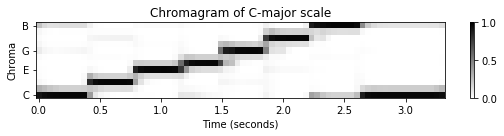

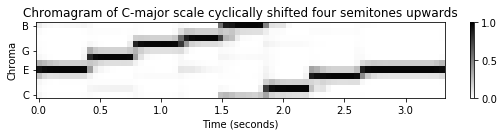

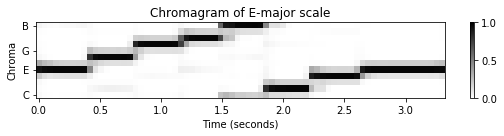

In [1]:
import sys
import os 

import numpy as np
from matplotlib import pyplot as plt
import librosa
from scipy.interpolate import interp1d
from scipy import signal

sys.path.append('..')
import libfmp.b
import libfmp.c2
%matplotlib inline

def cyclic_shift(C, shift=1):
    """Cyclically shift a chromagram

    Notebook: C3/C3S1_TranspositionTuning.ipynb

    Args:
        C (np.ndarray): Chromagram
        shift (int): Tranposition shift (Default value = 1)

    Returns:
        C_shift (np.ndarray): Cyclically shifted chromagram
    """
    C_shift = np.roll(C, shift=shift, axis=0)
    return C_shift
    
x_cmajor, Fs = librosa.load(os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale.wav'))
x_emajor, Fs = librosa.load(os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale_400-cents-up.wav'))

N = 4096
H = 1024
figsize = (8, 2)
yticks = [0, 4, 7, 11]

C = librosa.feature.chroma_stft(y=x_cmajor, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
title = 'Chromagram of C-major scale'
libfmp.b.plot_chromagram(C, Fs/H, figsize=figsize, title=title, clim=[0, 1], chroma_yticks=yticks)

C = librosa.feature.chroma_stft(y=x_cmajor, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
C_shift = cyclic_shift(C, shift=4)
title = 'Chromagram of C-major scale cyclically shifted four semitones upwards'
libfmp.b.plot_chromagram(C_shift, Fs/H, figsize=figsize, title=title, clim=[0, 1], chroma_yticks=yticks)

C = librosa.feature.chroma_stft(y=x_emajor, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
title = 'Chromagram of E-major scale'
libfmp.b.plot_chromagram(C, Fs/H, figsize=figsize, title=title, clim=[0, 1], chroma_yticks=yticks);

## Tuning 

While transpositions are pitch shifts on the semitone level, we now discuss global frequency deviations on the sub-semitone level. Such deviations may be the result of instruments that are tuned lower or higher than the expected reference pitch $\mathrm{A4}$ with center frequency $440~\mathrm{Hz}$. For example, many modern orchestras are using a tuning frequency slightly above $440$ Hz, whereas ensembles that play Baroque music are often tuned lower than $440$ Hz. As an extreme example, consider a recording of a $\mathrm{C}$-major scale, one time played on a piano with standard tuning and one time played on a piano tuned $40$ [cents](../C1/C1S3_FrequencyPitch.html) upwards.

<audio src="../data/C3/FMP_C3_F08_C-major-scale.wav" type="audio/mpeg" controls="controls"></audio>
<audio src="../data/C3/FMP_C3_F08_C-major-scale_40-cents-up.wav" type="audio/mpeg" controls="controls"></audio>

The following figure shows chromagrams assuming the equal-tempered scale with reference tuning $440$ Hz. In the first chromagram the energy is concentrated in the expected chroma bands, whereas in the detuned case the energy of the respective notes is no longer captured by individual chroma bands, but smeared across neighboring bands. 

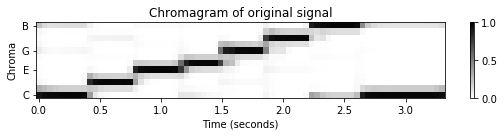

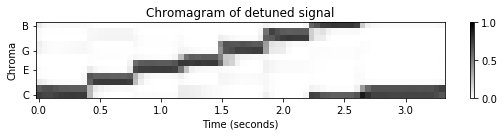

In [2]:
Fs = 22050
fn_wav = os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale.wav')
x, Fs = librosa.load(fn_wav, Fs)
fn_wav = os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale_40-cents-up.wav')
x_detune, Fs = librosa.load(fn_wav, Fs)

figsize = (8, 2)
yticks = [0, 4, 7, 11]
N = 4096
H = 1024

C = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
title = 'Chromagram of original signal'
libfmp.b.plot_chromagram(C, Fs/H, figsize=figsize, title=title, clim=[0, 1], chroma_yticks=yticks)

C = librosa.feature.chroma_stft(y=x_detune, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)
title = 'Chromagram of detuned signal'
libfmp.b.plot_chromagram(C, Fs/H, figsize=figsize, title=title, clim=[0, 1], chroma_yticks=yticks);

To compensate for tuning effects, one needs to perform an additional tuning estimation step to adjust the [center frequencies](../C1/C1S3_FrequencyPitch.html) of the MIDI pitches and the logarithmic partitioning for computing the [pitch-based log-frequency spectrogram](../C3/C3S1_SpecLogFreq-Chromagram.html). More precisely, let $\theta\in[-50,50)$ (given in cents) be the global tuning deviation. Then the formula of the adjusted center frequencies is given by

$$
F^\theta_\mathrm{pitch}(p) = 2^{(p-69+\theta/100)/12} \cdot 440.
$$

The adjustment of the logarithmic partitioning is built into the `librosa`-function for computing a chromagram, as demonstrated in the code cell using our detuned ($\theta=40$ cents) $\mathrm{C}$-major scale.

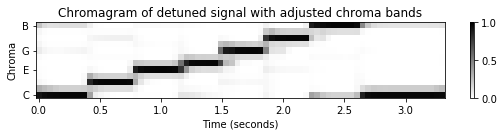

In [3]:
theta = 40
tuning = theta / 100
C = librosa.feature.chroma_stft(y=x_detune, sr=Fs, tuning=tuning, norm=2, hop_length=H, n_fft=N)
title = 'Chromagram of detuned signal with adjusted chroma bands'
libfmp.b.plot_chromagram(C, Fs/H, figsize=figsize, title=title, clim=[0, 1], chroma_yticks=yticks);

## Tuning Estimation

The tuning of musical instruments is usually based on a fixed reference pitch. In Western music, one typically uses the **concert pitch** $\mathrm{A4}$ having a frequency of $440~\mathrm{Hz}$. Therefore, playing the note $\mathrm{A4}$, one can expect dominant frequencies in a neighborhood of $440~\mathrm{Hz}$ (corresponding to the fundamental frequency) and its integer multiples (corresponding to the harmonics). Let $x=(x(0), x(1), ..., x(N-1))$ be a sampled signal (using the sampling rate $F_\mathrm{s}$) of a recorded note $\mathrm{A4}$. Furthermore, let $X = \mathrm{DFT}_N \cdot x$ be its [discrete Fourier transform](../C2/C2_DFT-FFT.html). Recall that the index $k\in[0:N-1]$ of the Fourier coefficient $X(k)$ corresponds to the [physical frequency](../C2/C2_STFT-Basic.html)

\begin{equation}
         F_\mathrm{coef}(k) := \frac{k\cdot F_\mathrm{s}}{N} 
\end{equation}

given in Hertz. One simple idea is to look for the frequency index $k_0$ that yields a maximal magnitude coefficient $|X(k_0)|$ in a neighborhood of $440~\mathrm{Hz}$ (e.g., plus/minus a semitone). The number

$$  \log_2\left(\frac{F_\mathrm{coef}(k_0)}{440}\right) \cdot 1200 $$ 

then yields an estimate of the tuning deviation (given in [cents](../C1/C1S3_FrequencyPitch.html)). To obtain a more robust estimate, one may also consider spectral peak positions in suitably defined neighborhoods of the harmonics. Of course, any other note may also be used as reference to estimate a tuning deviation.

In general, given an entire music recording, one can not assume that one has a single note being played in isolation. In the following, we consider the scenario where the recorded music is based on the $12$-tone equal-tempered scale, but possibly deviates from the ideal tuning. We assume that this deviation can be expressed by a single parameter $\theta$ given in [cents](../C1/C1S3_FrequencyPitch.html). For example, in our detuned $\mathrm{C}$-major scale used before, we have $\theta=40$  cents. The objective of tuning estimation is then to determine this parameter $\theta$. In the following, we describe a basic procedure.

1. First, we compute a kind of overall frequency distribution of the signal. In the subsequent function `compute_freq_distribution`, we consider two options:
    *  `Local=True`: Compute a (local) magnitude STFT of the signal and then average over time. 
    * `Local=False`: Compute a (global) magnitude DFT of the entire signal. 

2. When computing the magnitude DFT or STFT, we apply [logarithmic compression](../C3/C3S1_LogCompression.html) to enhance small signal components (e.g., `gamma=100`).

3. Then, we convert the frequency axis (given in Hertz) into a **logarithmic axis** (given in cents with a one-cent resolution) using [interpolation techniques](../C2/C2_STFT-FreqGridInterpol.html). This results in a vector $v\in\mathbb{R}^M$, which represents the frequency distribution of the signal.

4. One may further enhance this vector by subtracting a local frequency average and by rectifying the result (only considering the positive part). In our implementation, the parameter `filt_len` specifies the filter length (in cents) used to compute the local average. For example, `filt_len=101` corresponds to roughly one semitone. 

5. In the next step, we define **comb-like template vectors** $\mathbf{t}_\theta\in\mathbb{R}^M$ (computed by the function `template_comb`) for all tuning parameters $\theta\in \Theta$. Each template $\mathbf{t}_\theta$ encodes the ideal pitch grid based on a $12$-tone equal-tempered scale with a reference tuning shifted by $\theta$ cents. The set $\Theta$ represents the set of all possible tuning deviations to be considered. In our implementation we use 
$$\Theta=[-50:49]=\{-50, -49, \ldots,-1, 0, 1, \ldots, 48, 49\}$$ 
representing the range of one semitone at a resolution of one cent. 

6. Finally, we compare $v$ with $\mathbf{t}_\theta$ for all $\theta\in \Theta$ using a suitable similarity measure. In our implementation (provided by the function `tuning_similarity`), we simply use the **inner product** $\langle v\mid\mathbf{t}_\theta\rangle$ for this comparison. The tuning parameter is then defined to be the **similarity-maximizing parameter** $\theta_\mathrm{max}$:
$$
\theta_\mathrm{max} = \mathrm{argmax}_{\theta\in\Theta}\langle v\mid\mathbf{t}_\theta\rangle
$$

Obviously, there are many ways to improve this basic procedure. An implementation of this basic procedure can be found in the next code cell. As a first example, we apply the procedure to the $\mathrm{C}$-major scale from above.

In [4]:
def compute_freq_distribution(x, Fs, N=16384, gamma=100.0, local=True, filt=True, filt_len=101):
    """Compute an overall frequency distribution

    Notebook: C3/C3S1_TranspositionTuning.ipynb

    Args:
        x (np.ndarray): Signal
        Fs (scalar): Sampling rate
        N (int): Window size (Default value = 16384)
        gamma (float): Constant for logarithmic compression (Default value = 100.0)
        local (bool): Computes STFT and averages; otherwise computes global DFT (Default value = True)
        filt (bool): Applies local frequency averaging and by rectification (Default value = True)
        filt_len (int): Filter length for local frequency averaging (length given in cents) (Default value = 101)

    Returns:
        v (np.ndarray): Vector representing an overall frequency distribution
        F_coef_cents (np.ndarray): Frequency axis (given in cents)
    """
    if local:
        # Compute an STFT and sum over time
        if N > len(x)//2:
            raise Exception('The signal length (%d) should be twice as long as the window length (%d)' % (len(x), N))
        Y, T_coef, F_coef = libfmp.c2.stft_convention_fmp(x=x, Fs=Fs, N=N, H=N//2, mag=True, gamma=gamma)
        # Error "range() arg 3 must not be zero" occurs when N is too large. Why?
        Y = np.sum(Y, axis=1)
    else:
        # Compute a single DFT for the entire signal
        N = len(x)
        Y = np.abs(np.fft.fft(x)) / Fs
        Y = Y[:N//2+1]
        Y = np.log(1 + gamma * Y)
        # Y = libfmp.c3.log_compression(Y, gamma=100)
        F_coef = np.arange(N // 2 + 1).astype(float) * Fs / N

    # Convert linearly spaced frequency axis in logarithmic axis (given in cents)
    # The minimum frequency F_min corresponds 0 cents.
    f_pitch = lambda p: 440 * 2 ** ((p - 69) / 12)
    p_min = 24               # C1, MIDI pitch 24
    F_min = f_pitch(p_min)   # 32.70 Hz
    p_max = 108              # C8, MIDI pitch 108
    F_max = f_pitch(p_max)   # 4186.01 Hz
    F_coef_log, F_coef_cents = libfmp.c2.compute_f_coef_log(R=1, F_min=F_min, F_max=F_max)
    Y_int = interp1d(F_coef, Y, kind='cubic', fill_value='extrapolate')(F_coef_log)
    v = Y_int / np.max(Y_int)

    if filt:
        # Subtract local average and rectify
        filt_kernel = np.ones(filt_len)
        Y_smooth = signal.convolve(Y_int, filt_kernel, mode='same') / filt_len
        # Y_smooth = signal.medfilt(Y_int, filt_len)
        Y_rectified = Y_int - Y_smooth
        Y_rectified[Y_rectified < 0] = 0
        v = Y_rectified / np.max(Y_rectified)

    return v, F_coef_cents

def template_comb(M, theta=0):
    """Compute a comb template on a pitch axis

    Notebook: C3/C3S1_TranspositionTuning.ipynb

    Args:
        M (int): Length template (given in cents)
        theta (int): Shift parameter (given in cents); -50 <= theta < 50 (Default value = 0)

    Returns:
        template (np.ndarray): Comb template shifted by theta
    """
    template = np.zeros(M)
    peak_positions = (np.arange(0, M, 100) + theta)
    peak_positions = np.intersect1d(peak_positions, np.arange(M)).astype(int)
    template[peak_positions] = 1
    return template

def tuning_similarity(v):
    """Compute tuning similarity

    Notebook: C3/C3S1_TranspositionTuning.ipynb

    Args:
        v (np.ndarray): Vector representing an overall frequency distribution

    Returns:
        theta_axis (np.ndarray): Axis consisting of all tuning parameters -50 <= theta < 50
        sim (np.ndarray): Similarity values for all tuning parameters
        ind_max (int): Maximizing index
        theta_max (int): Maximizing tuning parameter
        template_max (np.ndarray): Similiarty-maximizing comb template
    """
    theta_axis = np.arange(-50, 50)  # Axis (given in cents)
    num_theta = len(theta_axis)
    sim = np.zeros(num_theta)
    M = len(v)
    for i in range(num_theta):
        theta = theta_axis[i]
        template = template_comb(M=M, theta=theta)
        sim[i] = np.inner(template, v)
    sim = sim / np.max(sim)
    ind_max = np.argmax(sim)
    theta_max = theta_axis[ind_max]
    template_max = template_comb(M=M, theta=theta_max)
    return theta_axis, sim, ind_max, theta_max, template_max

fn_wav = os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, sr=Fs)

v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, 
                                            local=True, filt_len=101)
theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)

print('Estimated tuning: %d cents' % theta_max)

Estimated tuning: 8 cents


## Parameter Dependency

To obtain a better idea on how this tuning estimation works, we visualize the similarity between $v$ and $\mathbf{t}_\theta$ as a function over $\theta\in\Theta=[-50:49]$ (using the function `plot_tuning_similarity`). Furthermore, we plot the frequency vector along with the similarity maximizing template (using the function `plot_freq_vector_template`). Continuing our example of the  $\mathrm{C}$-major scale, the following illustrations shows also the role of various parameter settings. 

Average STFT (Local=True), without enhancement (Filt=False):


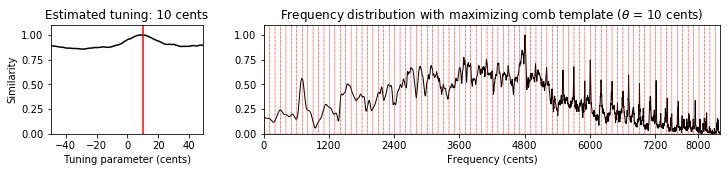

Average STFT (Local=True), with enhancement (Filt=True):


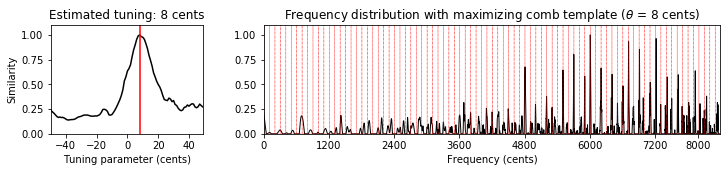

Global DFT (Local=False), with enhancement (Filt=True):


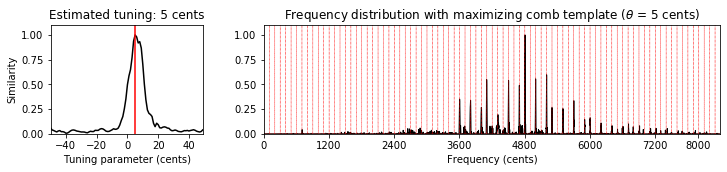

In [5]:
def plot_tuning_similarity(sim, theta_axis, theta_max, ax=None, title=None, figsize=(4, 3)):
    """Plots tuning similarity

    Notebook: C3/C3S1_TranspositionTuning.ipynb

    Args:
        sim: Similarity values
        theta_axis: Axis consisting of cent values [-50:49]
        theta_max: Maximizing tuning parameter
        ax: Axis (in case of ax=None, figure is generated) (Default value = None)
        title: Title of figure (or subplot) (Default value = None)
        figsize: Size of figure (only used when ax=None) (Default value = (4, 3))

    Returns:
        fig: Handle for figure
        ax: Handle for axes
        line: handle for line plot
    """
    fig = None
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(1, 1, 1)
    if title is None:
        title = 'Estimated tuning: %d cents' % theta_max
    line = ax.plot(theta_axis, sim, 'k')
    ax.set_xlim([theta_axis[0], theta_axis[-1]])
    ax.set_ylim([0, 1.1])
    ax.plot([theta_max, theta_max], [0, 1.1], 'r')
    ax.set_xlabel('Tuning parameter (cents)')
    ax.set_ylabel('Similarity')
    ax.set_title(title)
    if fig is not None:
        plt.tight_layout()
    return fig, ax, line

def plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=None, title=None, figsize=(8, 3)):
    """Plots frequency distribution and similarity-maximizing template

    Notebook: C3/C3S1_TranspositionTuning.ipynb

    Args:
        v: Vector representing an overall frequency distribution
        F_coef_cents: Frequency axis
        template_max: Similarity-maximizing template
        theta_max: Maximizing tuning parameter
        ax: Axis (in case of ax=None, figure is generated) (Default value = None)
        title: Title of figure (or subplot) (Default value = None)
        figsize: Size of figure (only used when ax=None) (Default value = (8, 3))

    Returns:
        fig: Handle for figure
        ax: Handle for axes
        line: handle for line plot
    """
    fig = None
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(1, 1, 1)
    if title is None:
        title = r'Frequency distribution with maximizing comb template ($\theta$ = %d cents)' % theta_max
    line = ax.plot(F_coef_cents, v, c='k', linewidth=1)
    ax.set_xlim([F_coef_cents[0], F_coef_cents[-1]])
    ax.set_ylim([0, 1.1])
    x_ticks_freq = np.array([0, 1200, 2400, 3600, 4800, 6000, 7200, 8000])
    ax.plot(F_coef_cents, template_max * 1.1, 'r:', linewidth=0.5)
    ax.set_xticks(x_ticks_freq)
    ax.set_xlabel('Frequency (cents)')
    plt.title(title)
    if fig is not None:
        plt.tight_layout()
    return fig, ax, line

# Load audio signal
fn_wav = os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, sr=Fs)

print('Average STFT (Local=True), without enhancement (Filt=False):', flush=True)
v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, 
                                            local=True, filt=False)
theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3], 
                                          'height_ratios': [1]}, figsize=(12, 2))
plot_tuning_similarity(sim, theta_axis, theta_max, ax=ax[0])
plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=ax[1])
plt.show()

print('Average STFT (Local=True), with enhancement (Filt=True):', flush=True)
v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, 
                                            local=True, filt_len=101)
theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3], 
                                          'height_ratios': [1]}, figsize=(12, 2))
plot_tuning_similarity(sim, theta_axis, theta_max, ax=ax[0])
plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=ax[1])
plt.show()

print('Global DFT (Local=False), with enhancement (Filt=True):', flush=True)
v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, 
                                            local=False, filt_len=101)
theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3], 
                                          'height_ratios': [1]}, figsize=(12, 2))
plot_tuning_similarity(sim, theta_axis, theta_max, ax=ax[0])
plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=ax[1])
plt.show()

## Music Examples

Audio example: Cmaj


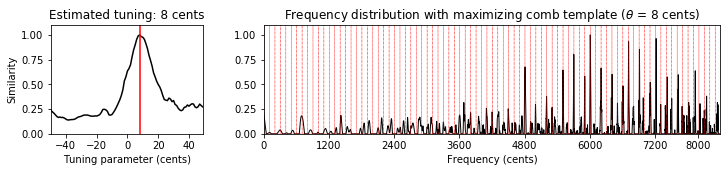

Audio example: Cmaj40


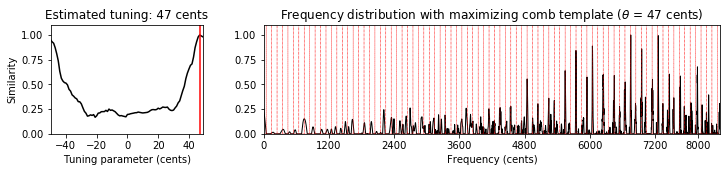

Audio example: C4violin


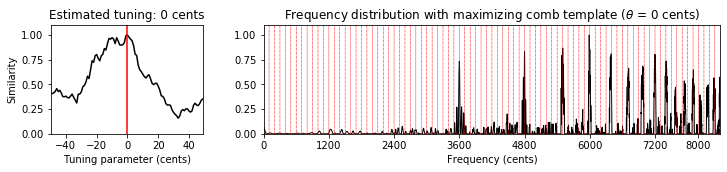

Audio example: Burgmueller


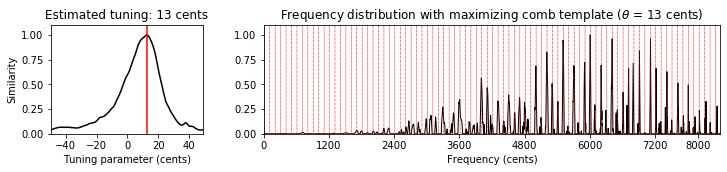

Audio example: Weber


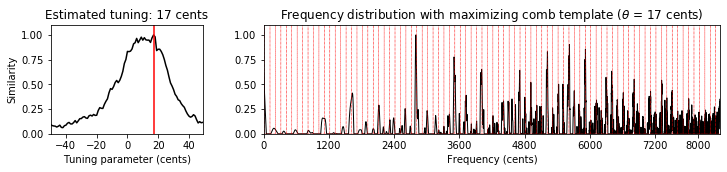

In [6]:
from IPython.display import Audio

fn_wav_dict = {}
fn_wav_dict['Cmaj'] = os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale.wav')
fn_wav_dict['Cmaj40'] = os.path.join('..', 'data', 'C3', 'FMP_C3_F08_C-major-scale_40-cents-up.wav')
#fn_wav_dict['C4flute'] = os.path.join('..', 'data', 'C3', 'FMP_C3_NoteC4_Flute.wav')
fn_wav_dict['C4violin'] = os.path.join('..', 'data', 'C3', 'FMP_C3_NoteC4_Violin.wav')
#fn_wav_dict['Burgmueller_short'] = os.path.join('..', 'data', 'C3', 'FMP_C3_F05.wav')
fn_wav_dict['Burgmueller'] = os.path.join('..', 'data', 'C3', 'FMP_C3_F05_BurgmuellerFirstPart.wav')
fn_wav_dict['Weber'] = os.path.join('..', 'data', 'C8', 'FMP_C8_F10_Weber_Freischuetz-06_FreiDi-35-40.wav')
#fn_wav_dict['BornMix'] = os.path.join('..', 'data', 'C8', 'FMP_C8_Audio_Bornemark_StopMessingWithMe-Excerpt_SoundCloud_mix.wav')
#fn_wav_dict['BornVocal'] = os.path.join('..', 'data', 'C8', 'FMP_C8_Audio_Bornemark_StopMessingWithMe-Excerpt_SoundCloud_vocals.wav')
#fn_wav_dict['BornAcc'] = os.path.join('..', 'data', 'C8', 'FMP_C8_Audio_Bornemark_StopMessingWithMe-Excerpt_SoundCloud_accomp.wav')

for name in fn_wav_dict:
    fn_wav = fn_wav_dict[name] 
    Fs = 22050
    x, Fs = librosa.load(fn_wav, sr=Fs)
    print('Audio example: %s' % name)
    display( Audio(x, rate=Fs) )
    v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, 
                                                local=True, filt_len=101)
    theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3], 
                                              'height_ratios': [1]}, figsize=(12, 2))
    plot_tuning_similarity(sim, theta_axis, theta_max, ax=ax[0])
    #title=r'Frequency distribution with maximizing comb template'
    title = None
    plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=ax[1],  title=title)
    plt.show()

## Dependency on Frequency Range

Another important aspect for tuning estimation is the frequency range considered. Even when considering a music recording that is perfectly tuned according to the $12$-tone equal scale, higher harmonics of the tuned pitches may introduce significant deviations from the equal-tempered grid. For details, we refer to the [FMP notebook on the harmonic series](../C1/C1S3_HarmonicSeries.html). Additional, for certain instruments such as the piano, there is a tendency that higher harmonics are stretched due to **inharmonicities** caused by string stiffness. This may lead to slightly increased tuning estimates when the upper frequency spectrum takes on too great a role. Finally, there are sometimes musical reasons why certain frequency ranges may be beneficial for tuning estimation, For example, in the Weber opera recording, the presence of the singer's strong vibrato and other pitch fluctuations make the tuning estimation fuzzy and unstable. In particular, the upper frequency range, which is dominated by the soprano singer, is problematic. 

To demonstrate the influence of the frequency range used, we conduct a small experiment based on the Weber example. In our basic tuning estimation procedure (see the settings in the function `compute_freq_distribution`), we use a logarithmically sampled frequency range between $33.7~\mathrm{Hz}$ (C1, $0$ cents) and $4186~\mathrm{Hz}$ (C8, $8400$ cents). In the following code cell, we cut away the upper frequency range above $6000$ cents, before applying the function `tuning_similarity`.

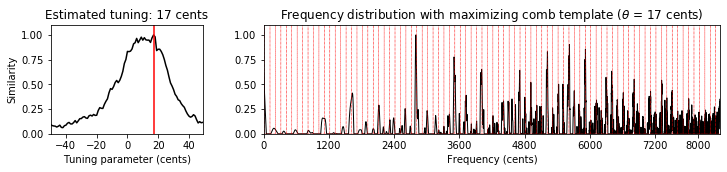

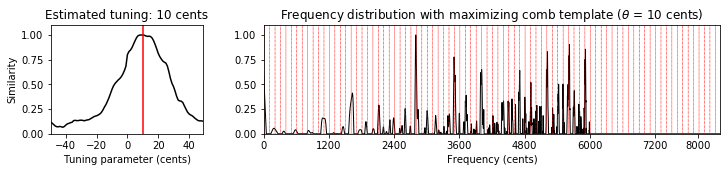

In [7]:
fn_wav = fn_wav_dict['Weber'] 
Fs = 22050
x, Fs = librosa.load(fn_wav, sr=Fs)

v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, local=True, filt_len=101)
theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3], 
                                          'height_ratios': [1]}, figsize=(12, 2))
plot_tuning_similarity(sim, theta_axis, theta_max, ax=ax[0])
plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=ax[1])
plt.show()

v, F_coef_cents = compute_freq_distribution(x, Fs=Fs, N=16384, gamma=10, local=True, filt_len=101)
v[6000:] = 0
theta_axis, sim, ind_max, theta_max, template_max = tuning_similarity(v)
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3], 
                                          'height_ratios': [1]}, figsize=(12, 2))
plot_tuning_similarity(sim, theta_axis, theta_max, ax=ax[0])
plot_freq_vector_template(v, F_coef_cents, template_max, theta_max, ax=ax[1])
plt.show()

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>